# Final analysis of results 

Materials Project entries were initially filtered using https://github.com/lucydot/mp-adventures/blob/main/imaginary_search.py, an initial analysis using https://github.com/lucydot/mp-adventures/blob/main/analysis_one.ipynb and a further Materials Project search for details on the filtered compounds using https://github.com/lucydot/mp-adventures/blob/main/Imaginary_search_two.ipynb. Here we analyse these latter results.

In [1]:
import pickle
import numpy as np
import re
import matplotlib.pyplot as plt
#from mp_api import MPRester

In [2]:
with open("results_analysis.pickle", 'rb') as pickle_file:
    results_dict = pickle.load(pickle_file)

In [3]:
# information stored for each material
results_dict['mp-23475'].keys()

dict_keys(['lowest_freq_position', 'lowest_freq', 'formula', 'band_gap'])

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   3.,
          1.,   0.,   3.,   1.,   3.,   3.,   1.,   5.,   3.,   4.,   6.,
          2.,   2.,   8.,   7.,   6.,   4.,   5.,   4.,   8.,   9.,   9.,
         16.,  14.,  17.,   6.,   5., 233.]),
 array([-6.11810151e+00, -5.99574081e+00, -5.87338011e+00, -5.75101940e+00,
        -5.62865870e+00, -5.50629800e+00, -5.38393730e+00, -5.26157659e+00,
        -5.13921589e+00, -5.01685519e+00, -4.89449449e+00, -4.77213378e+00,
        -4.64977308e+00, -4.52741238e+00, -4.40505168e+00, -4.28269097e+00,
        -4.16033027e+00, -4.03796957e+00, -3.91560886e+00, -3.79324816e+00,
        -3.67088746e+00, -3.54852676e+00, -3.42616605e+00, -3.30380535e+00,
        -3.18144465e+00, -3.05908395e+00, -2.93672324e+00, -2.81436254e+00,
        -2.69200184e+00, -2.56964114e+00, -2.44728043e+00, -2.32491973e+00,
        -2.20255903e+00, -2.08019833e+00, -1.95783

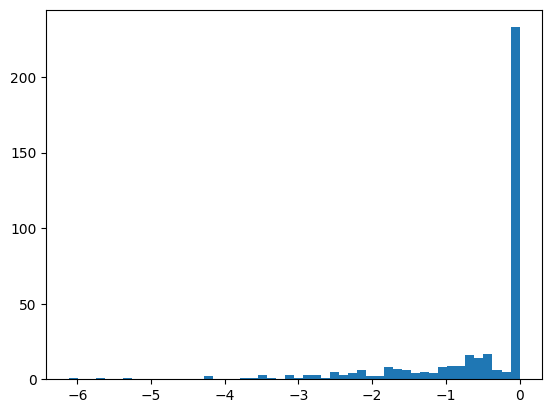

In [4]:
# histogram of the imaginary mode frequencies
# we see that most materials have a small imaginary mode between 0 and -0.1eV
lowest_freqs = []
for value in results_dict.values():
    lowest_freqs.append(value['lowest_freq'])

counts, bins = np.histogram(lowest_freqs,bins=50)
plt.hist(bins[:-1], bins, weights=counts)

In [5]:
# 180 materials have imaginary mode less than 0.001eV. The cutoff for what counts as numerical noise, 
# and what counts as an imaginary mode proper is completely arbitrary.
# However reducing the cutoff to 0.0001 gives a jump to 345 (out of 395) so this choice makes some sense...

results_dict_filtered = {k: v for k, v in results_dict.items() if v['lowest_freq'] < -0.001}
len(results_dict_filtered)

180

(array([ 1.,  9., 10.,  9.,  6.,  8.,  2.,  9.,  3.,  3., 11.,  7.,  8.,
         1.,  1.,  6.,  2.,  5., 10.,  4.,  9.,  5.,  5.,  2.,  4.,  4.,
         3.,  0.,  4.,  4.,  2.,  2.,  3.,  1.,  0.,  2.,  1.,  1.,  3.,
         1.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  1.]),
 array([0.     , 0.16647, 0.33294, 0.49941, 0.66588, 0.83235, 0.99882,
        1.16529, 1.33176, 1.49823, 1.6647 , 1.83117, 1.99764, 2.16411,
        2.33058, 2.49705, 2.66352, 2.82999, 2.99646, 3.16293, 3.3294 ,
        3.49587, 3.66234, 3.82881, 3.99528, 4.16175, 4.32822, 4.49469,
        4.66116, 4.82763, 4.9941 , 5.16057, 5.32704, 5.49351, 5.65998,
        5.82645, 5.99292, 6.15939, 6.32586, 6.49233, 6.6588 , 6.82527,
        6.99174, 7.15821, 7.32468, 7.49115, 7.65762, 7.82409, 7.99056,
        8.15703, 8.3235 ]),
 <BarContainer object of 50 artists>)

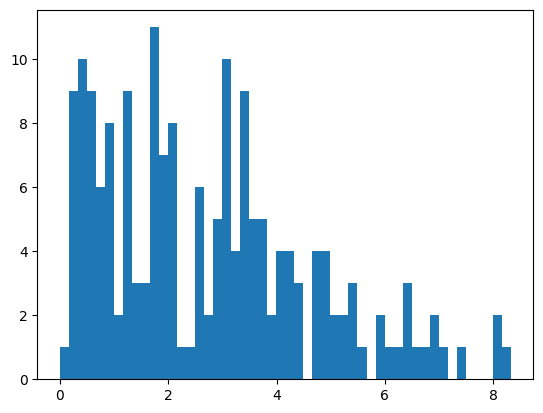

In [6]:
# plot band gap histogram for 180 filtered structures. From the MP website:
# DFT.. systematically under-estimates band gaps by a large margin. 
# For this reason, any screening based on band gap has to include a large safety margin of ~0.5 eV.
# with this in mind, it looks like we can estimate ~160 of the materials have a band gap, 
# with about half of those being semiconductors (less than 3eV band gap) and the other half insulators (> 3eV)
band_gaps = []
for value in results_dict_filtered.values():
    try:
        band_gaps.append(value['band_gap'])
    except:
        pass
counts, bins = np.histogram(band_gaps,bins=50)
plt.hist(bins[:-1], bins, weights=counts)

In [10]:
count=0
for key,value in results_dict_filtered.items():
    try:
        if 'O' in value['formula']:
            count+=1
            print(value['formula'])
    except:
        pass
print(count)

# only five have less than 5 atoms in unit cell...leaving 59 listed below
## note sulphates / phosphates / silicates
## remove high toxicity? some are well studied e.g. BaZrO3
# Ba2NbInO6 (10)
# Sr4As2O (7)
# Na3ClO (5)
# Sr4As2O (7)
# BaZrO3 (5)
# BaSnO3 (5) 
# MgTiO3 (5)
# Ba2YBiO6 (10)
# Na2CO3 (6)
# CsNb(PO4)2 (12)
# Ba4As2O (7)
# Sr2LiReO6 (10)
# K2Ti2O5 (9)
# Sr2PdO3 (6)
# RbTl(SO4)2 (12)
# Rb4Br2O (7)
# Ba2YNbO6 (10)
# Ba4Sb2O (7)
# Ba2LaTaO6 (10)
# SrBe3O4 (8)
# BaTeO3 (5)
# BaBeSiO4 (7)
Mg2P2O7 (11)
Ba2PbO4 (7)
Ba2YTaO6 (10)
Li2ZrO3 (6)
Ca2As2O7 (11)
KSeO2F (5)
RbNO3 (5)
KAg2AsO4 (8)
K3NbO8 (12)
KNbO3 (5)
Ba2TaBiO6 (10)
In2Ge2O7 (11)
Mg2As2O7 (11)
SrSeO3 (5)
KSrCO3F (7)
CsAlO2 (4)
Ba2YSbO6 (10)
Ba2NaReO6 (10)
TlPO4 (6)
K2SrTa2O7 (12)
BeSO4 (6)
LiScAs2O7 (11)
Sr4P2O (7)
KSO2F (5)
BaTiO3 (5)
Li5SbO5 (11)
Cs4Sb2O5 (11)
Rb2HBrO (5)
K2TiO3 (6)
Ba2CaTeO6 (10)
Rb3AuO (5)
Li2SiO3 (6)
KBe2BO3F2 (9)
K2Os(Cl2O)2 (9)
Ba2LaNbO6 (10)
K2ZnO2 (5)
RbTa(PO4)2 (12)
K3TaO8 (12)

ZrO2
Ba2NbInO6
Na3ClO
Sr4As2O
BaZrO3
BaSnO3
MgTiO3
Ba2YBiO6
Na2CO3
CsNb(PO4)2
Ba4As2O
Sr2LiReO6
K2Ti2O5
Sr2PdO3
RbTl(SO4)2
Rb4Br2O
Ba2YNbO6
Ba4Sb2O
Ba2LaTaO6
SrBe3O4
BaTeO3
BaBeSiO4
Mg2P2O7
Ba2PbO4
Ba2YTaO6
Li2ZrO3
Ca2As2O7
KSeO2F
RbNO3
RbAlO2
Cs2O2
KAg2AsO4
K3NbO8
KNbO3
Ba2TaBiO6
In2Ge2O7
Mg2As2O7
SrSeO3
KSrCO3F
CsAlO2
SrO2
Ba2YSbO6
Ba2NaReO6
TlPO4
K2SrTa2O7
BeSO4
LiScAs2O7
Sr4P2O
KSO2F
BaTiO3
Li5SbO5
Cs4Sb2O5
Rb2HBrO
K2TiO3
Ba2CaTeO6
Rb3AuO
YHO2
Li2SiO3
KBe2BO3F2
K2Os(Cl2O)2
Ba2LaNbO6
K2ZnO2
RbTa(PO4)2
K3TaO8
64


In [78]:
# I wonder if there is a Python library for filtering out compounds containing toxic or radioactive elements? - 
# perhaps in ASE?
# If not, this would be a great undergraduate summer project...

# One which caught my eye is SiC, as this is such a well explored material. Looking on the MP website,
# it looks like there are many entries for SiC, so what is listed here may be an experimentally observed
# metastable state with the lower energy structure (at 0T) also listed on MP
# infact, we can see this is the case by following the "decomposes into" link on the MP 
# Doing a search through manually I find that the following compounds have lower energy structures
# on the MP website (although a number of the lower energy structures do not have phonon data so may 
# not be kinetically stable):
# ZrO2, BeF2, BaSe, Cs3YF6, CsSnI3,CsNbN2, Na2CO3, CsF, NaNbN2, Sr2LiReO6, K3Sb, Li3Sb, NaCl,Mg2P2O7,
# Ba2YTaO6, SrTe, CaBr2, RbNO3, KNbO3, CuBr, CdS, BaTiO3, AgI, AlF3, SrZrN2, RbAlF4, KRb2ScF6 (27 total)
# 180 - 27 = 153
# then there are examples like Ba2ZrS4 which has an imaginary mode, but for which the kinetically 
# stable structure
# is known (distorted orthorhombic) but simply not on the materials project.
for key,value in results_dict_filtered.items():
    try:
        print(value['formula'],'https://legacy.materialsproject.org/materials/'+key)
    except:
        pass


Rb2PbCl6 https://legacy.materialsproject.org/materials/mp-23475
Na3SbSe4 https://legacy.materialsproject.org/materials/mp-8703
BeF2 https://legacy.materialsproject.org/materials/mp-558118
ZrO2 https://legacy.materialsproject.org/materials/mp-1565
BaSe https://legacy.materialsproject.org/materials/mp-10680
Ba2NbInO6 https://legacy.materialsproject.org/materials/mp-20620
K2NaScF6 https://legacy.materialsproject.org/materials/mp-6058
Na3ClO https://legacy.materialsproject.org/materials/mp-28602
Sr4As2O https://legacy.materialsproject.org/materials/mp-8299
K2NaInF6 https://legacy.materialsproject.org/materials/mp-6686
BaZrO3 https://legacy.materialsproject.org/materials/mp-3834
Cs2As3 https://legacy.materialsproject.org/materials/mp-15557
BaB2F8 https://legacy.materialsproject.org/materials/mp-558430
BaSnO3 https://legacy.materialsproject.org/materials/mp-3163
Ba2ZrS4 https://legacy.materialsproject.org/materials/mp-3813
NaSbF6 https://legacy.materialsproject.org/materials/mp-5955
RbHgF3 h

In [42]:
# note that this is the position of the phonon mode with the lowest imaginary frequency
# there may be other imaginary frequencies at other points in k-space

for value in results_dict_filtered.values():
    print(value['lowest_freq_position'])

end of K-\Gamma
end of \Gamma-H
start of \Gamma-A
end of \Gamma-X
end of X-M
start of \Gamma-L
end of K-\Gamma
end of \Gamma-R
end of \Sigma_1-N
end of K-\Gamma
end of \Gamma-R
end of \Gamma-Z
end of \Gamma-R
end of \Gamma-X
end of K-\Gamma
end of \Gamma-R
start of \Gamma-Z
end of Y-X_1
end of \Gamma-Z
end of M-K
end of B-Z
start of \Gamma-X
end of K-\Gamma
start of \Gamma-L
end of K-\Gamma
end of I_1-Z
start of \Gamma-L
end of \Gamma-Y
end of \Sigma-\Gamma
end of \Gamma-Y
end of \Gamma-Y
start of \Gamma-X
end of \Gamma-R
end of X-M
end of Q-F
start of \Gamma-L
end of \Gamma-R
end of X-\Gamma
start of \Gamma-L
end of M-K
end of \Gamma-Z
end of L-T
end of X-M
end of Z-\Gamma
end of \Gamma-X
start of \Gamma-X
end of F-L
end of \Gamma-Y
end of \Gamma-X
end of M-K
end of K-\Gamma
start of \Gamma-L
end of \Gamma-M
start of \Gamma-X
end of \Gamma-Y
start of \Gamma-X
end of K-\Gamma
start of \Gamma-F
start of \Gamma-L
end of X-M
end of K-\Gamma
end of A-X
end of I_1-Z
start of \Gamma-L
end of